# INE5202 – Cálculo Numérico
## Segundo Exercício Programa
---
Autores:
- Lucas de Oliveira Marisco
- Carlos Benedito Hayden de Albuquerque Junior

Data: Julho de 2025


---
## Objetivo

Este trabalho tem como objetivo a implementação do **método de Runge-Kutta de quarta ordem** para simular numericamente o espalhamento de uma doença em três diferentes modelos matemáticos de Equações Diferenciais Ordinárias (EDOs):
 - **SIR**
 - **SIRS**
 - **SIRV**.
> Cada modelo será avaliado com diferentes parâmetros e condições iniciais. Os resultados obtidos são discutidos por meio de gráficos, tabelas e análise qualitativa.


---
## Modelos Matemáticos

### Modelo SIR

\begin{cases}
\frac{dS}{dt} = -\beta S I \\
\frac{dI}{dt} = \beta S I - \gamma I \\
\frac{dR}{dt} = \gamma I
\end{cases}


### Modelo SIRS

\begin{cases}
\frac{dS}{dt} = -\beta S I + \nu R \\
\frac{dI}{dt} = \beta S I - \gamma I \\
\frac{dR}{dt} = \gamma I - \nu R
\end{cases}

### Modelo SIRV

\begin{cases}
\frac{dS}{dt} = -\beta S I + \nu R - pS \\
\frac{dI}{dt} = \beta S I - \gamma I \\
\frac{dR}{dt} = \gamma I - \nu R \\
\frac{dV}{dt} = pS
\end{cases}


---
## Método de Runge-Kutta de Quarta Ordem (RK4)
Apresenta-se o método desenvolvido pelos matemáticos alemães Carl Runge e Wilhelm Kutta, por volta de 1895, e estendido em 1901. Esse método recebe a denominação de método clássico de Runge-Kutta de quarta ordem, ou simplismente método Runge-Kutta, ou ainda mais abreviadamente, RK4.

É amplamente utilizado para resolver EDOs de forma numérica. O método RK4 é uma extensão do método de Euler, oferecendo maior precisão ao calcular a solução de um sistema de EDOs e estabeleceequações com a seguinte estrutura:

$$
\begin{aligned}
y_{i+1} = y_i + \text{inclinação} \cdot h
\end{aligned}
$$

sendo a *inclinação* o valor obtido a partir do cálculo de $f(x_i, y_i)$ em alguns pontos do intervalo $[x_i, x_{i+1}]$ e $h$ o tamanho do passo.
As equações que estabelecem o método de Runge-Kutta são:
$$
y_{i+1} = y_i + k_{média} \cdot h
$$
Sendo:
$$
k_{média} \cdot h = \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
e
$$
x = tempo(t), y = população(y)
$$
Para esse exercicio temos:
$$
\\
\begin{aligned}
y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

onde:

$$
\begin{aligned}
k_1 &= f(t_i, y_i) \\
k_2 &= f(t_i + \frac{h}{2}, y_i + \frac{h}{2}k_1) \\
k_3 &= f(t_i + \frac{h}{2}, y_i + \frac{h}{2}k_2) \\
k_4 &= f(t_i + h, y_i + hk_3)
\end{aligned}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def rk4_system(func, y0, t):
    """ Runge-Kutta de quarta ordem para sistemas de EDOs.
    Args:
        func: Função que define o sistema de EDOs.
        y0: Condições iniciais (vetor).
        t: Vetor de tempos para a solução.

    Returns:
        y: Solução do sistema de EDOs ao longo do tempo.
    """
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(1, n):
        # Cálculo dos coeficientes k1, k2, k3, k4
        k1 = func(t[i-1], y[i-1])
        k2 = func(t[i-1] + h/2, y[i-1] + h/2 * k1)
        k3 = func(t[i-1] + h/2, y[i-1] + h/2 * k2)
        k4 = func(t[i-1] + h, y[i-1] + h * k3)
        # Atualização da solução
        #
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y


---
## Tarefa:
Implementar o método de Runge-Kutta de quarta ordem para aproximar as soluções dos sistemas de EDOs (1), (2) e (3). Os parâmetros dos três modelos são descritos a seguir:

- 1. Os parâmetros $β = 10/(40·8·24)$ e $γ = 3/(15·24)$. Ou seja, em `24 horas` de `40 suscetíveis` e `8 infectados` passou-se a `30` e `18`, respectivamente. Além disso, de `15 indivíduos infectados`, `3 se recuperaram` durante `um dia`.
- 2. O parâmetro $\nu^{-1} = 50$ representa o tempo de `50 dias` para a perda da imunidade.
- 3. O parâmetro que representa a adesão a vacina, $p = 0.0005$.

Apresente os resultados de duas simulações para cada um dos modelos variando os parâmetros e com as
seguintes condições iniciais.


## Modelo SIR
### 📈 Simulação 1 -  (25 dias)
#### Objetivo:
Determinar aproximações para as funções $S(t)$, $I(t)$ e $R(t)$ em determinados instantes de tempo, de um intervalo de tempo
$[t0, tn]$, com $β$ e $γ$ parâmetros do modelo e com as condições iniciais $S(t0) = S0$, $I(t0) = I0$ e $R(t0) = R0$.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$ e tempo final $tn = 25$ dias:

In [3]:
# Define o sistema de EDOs SIR
def sir_model(beta, gamma):
    """ Define o modelo SIR.
    Args:
        beta: Taxa de infecção.
        gamma: Taxa de recuperação.
    Returns:
        f: Função que define o sistema de EDOs SIR.
    """
    def f(t, y):
        S, I, R = y
        dS = -beta * S * I
        dI = beta * S * I - gamma * I
        dR = gamma * I
        return np.array([dS, dI, dR])
    return f


In [4]:
# Interpretação do modelo SIR:
# Parâmetros da simulação (Simulação 1)
beta_h = 10. / (40 * 8 * 24)
gamma_h = 3. / (15 * 24)
beta = beta_h * 24      # converção para dias
gamma = gamma_h * 24    # converção para dias

S0, I0, R0 = 49.0, 1.0, 0.0
dt = 0.1   # passo de tempo em dias
D = 25     # duração total em dias
N = int(D / dt)
t = np.linspace(0, D, N + 1)  # vetor de tempo em dias



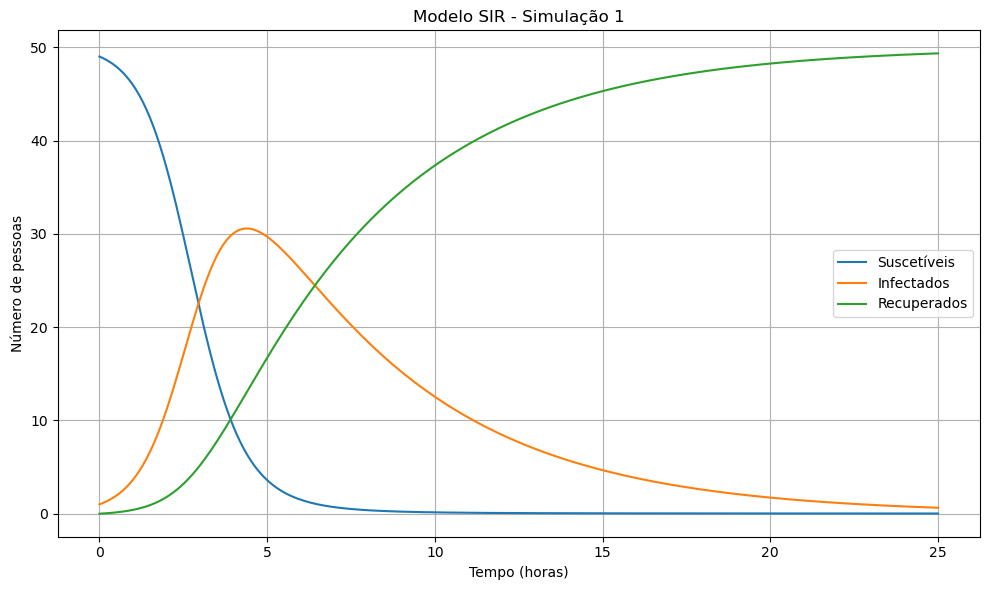

In [5]:
# Executar simulação
y0 = [S0, I0, R0]
sol = rk4_system(sir_model(beta, gamma), y0, t)
S, I, R = sol.T

# Plotagem
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tempo (horas)')
plt.ylabel('Número de pessoas')
plt.title('Modelo SIR - Simulação 1')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

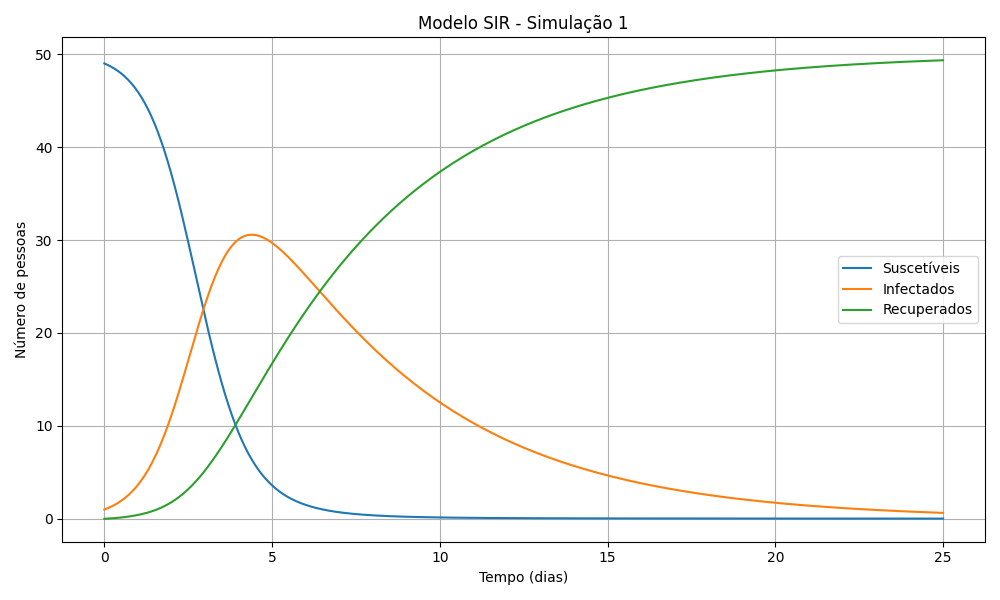

## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: O número de suscetíveis diminui rapidamente no início devido à rápida disseminação da doença, e depois a taxa de diminuição diminui à medida que o número de infectados diminui
- `Infectados (I)`: Começa baixo, cresce até um pico, por volta do dia 4, conforme a doença se espalha e depois diminui à medida que as pessoas se recuperam.
- `Recuperados (R)`: Começa em zero e aumenta continuamente conforme os infectados se recuperam.

**Interpretação**:
No início (dia 0), quase todos são suscetíveis e apenas uma pessoa está infectada. Com o passar do tempo, nota-se o número de infectados aumentar, os de suscetíveis diminuir rapidamente. A população recuperada aumenta durante todo o processo.


In [6]:

# Criar um DataFrame com os resultados
df_sir1 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 1 (Modelo SIR):")
print(df_sir1.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 1 (Modelo SIR):")
print(df_sir1.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 1 (Modelo SIR):")
print(df_sir1.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes = df_sir1['Infectados (I)'].max()
tempo_pico = df_sir1.loc[df_sir1['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções: {pico_infeccoes:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sir1['População Total'] = df_sir1['Suscetíveis (S)'] + df_sir1['Infectados (I)'] + df_sir1['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (deve ser constante para o modelo SIR):")
print(df_sir1[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial = df_sir1['População Total'][0]
diferenca_max_populacao = (df_sir1['População Total'] - populacao_inicial).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início: {diferenca_max_populacao:.6f}")
if diferenca_max_populacao < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância), como esperado para o modelo SIR.")
else:
    print("A População Total não se manteve constante, pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 5 dias)
print("\nValores de S, I, R a cada 5 dias (Simulação 1 - Modelo SIR):")
print(df_sir1[df_sir1['Tempo (Dias)'] % 5 == 0])

Primeiras linhas dos resultados da Simulação 1 (Modelo SIR):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0           0.0        49.000000        1.000000         0.000000
1           0.1        48.836503        1.142107         0.021390
2           0.2        48.650489        1.303697         0.045814
3           0.3        48.439089        1.487227         0.073684
4           0.4        48.199134        1.695399         0.105467

Últimas linhas dos resultados da Simulação 1 (Modelo SIR):
     Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
246          24.6         0.022160        0.689496        49.288345
247          24.7         0.022112        0.675890        49.301998
248          24.8         0.022066        0.662552        49.315382
249          24.9         0.022021        0.649477        49.328502
250          25.0         0.021977        0.636660        49.341363

Estatísticas descritivas da Simulação 1 (Modelo SIR):
       Tempo (Dias) 

```
Primeiras linhas dos resultados da Simulação 1 (Modelo SIR):
    Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0             0.0        49.000000        1.000000         0.000000
1             0.1        48.836503        1.142107         0.021390
2             0.2        48.650489        1.303697         0.045814
3             0.3        48.439089        1.487227         0.073684
4             0.4        48.199134        1.695399         0.105467

Últimas linhas dos resultados da Simulação 1 (Modelo SIR):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
246           24.6         0.022160        0.689496        49.288345
247           24.7         0.022112        0.675890        49.301998
248           24.8         0.022066        0.662552        49.315382
249           24.9         0.022021        0.649477        49.328502
250           25.0         0.021977        0.636660        49.341363

Estatísticas descritivas da Simulação 1 (Modelo SIR):
        Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
count     251.000000       251.000000      251.000000       251.000000
mean       12.500000         5.896570        9.832169       34.271262
std         7.260165        13.411367        9.497853       16.710286
min         0.000000         0.021977        0.636660        0.000000
25%         6.250000         0.028136        1.962657       23.607033
50%        12.500000         0.066288        5.802289       42.275680
75%        18.750000         1.226293       15.971524       47.760119
max        25.000000        49.000000       30.572402       49.341363

Pico de infecções: 30.57 indivíduos, ocorrendo aproximadamente no dia 4.40

Variação da População Total ao longo do tempo (deve ser constante para o modelo SIR):
      Tempo (Dias)  População Total
246           24.6             50.0
247           24.7             50.0
248           24.8             50.0
249           24.9             50.0
250           25.0             50.0

Diferença máxima na População Total em relação ao início: 0.000000
A População Total se manteve constante (dentro da tolerância), como esperado para o modelo SIR.

Valores de S, I, R a cada 5 dias (Simulação 1 - Modelo SIR):
      Tempo (Dias)  Suscetíveis (S)  ...  Recuperados (R)  População Total
0              0.0        49.000000  ...         0.000000             50.0
50             5.0         3.597042  ...        16.714941             50.0
100           10.0         0.143659  ...        37.325644             50.0
150           15.0         0.041357  ...        45.294965             50.0
200           20.0         0.026064  ...        48.249692             50.0
250           25.0         0.021977  ...        49.341363             50.0
```

---
## Modelo SIR
### 📈 Simulação 2 -  (300 dias)
#### Objetivo:
Considere uma medida de distanciamento social que reduz o parâmetro β em quatro vezes e tempo final tn = 300 dias.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [7]:
# Parâmetros da simulação (Simulação 2)
beta_h = 10. / (40 * 8 * 24)
gamma_h = 3. / (15 * 24)

beta = (beta_h * 24) / 4   # Beta / 4 como solicitado para 2º Simulação
gamma = gamma_h * 24

S0, I0, R0 = 49.0, 1.0, 0.0
dt = 0.1   # passo de tempo em dias
D = 300     # duração total em dias
N = int(D / dt)
t = np.linspace(0, D, N + 1)  # vetor de tempo em dias

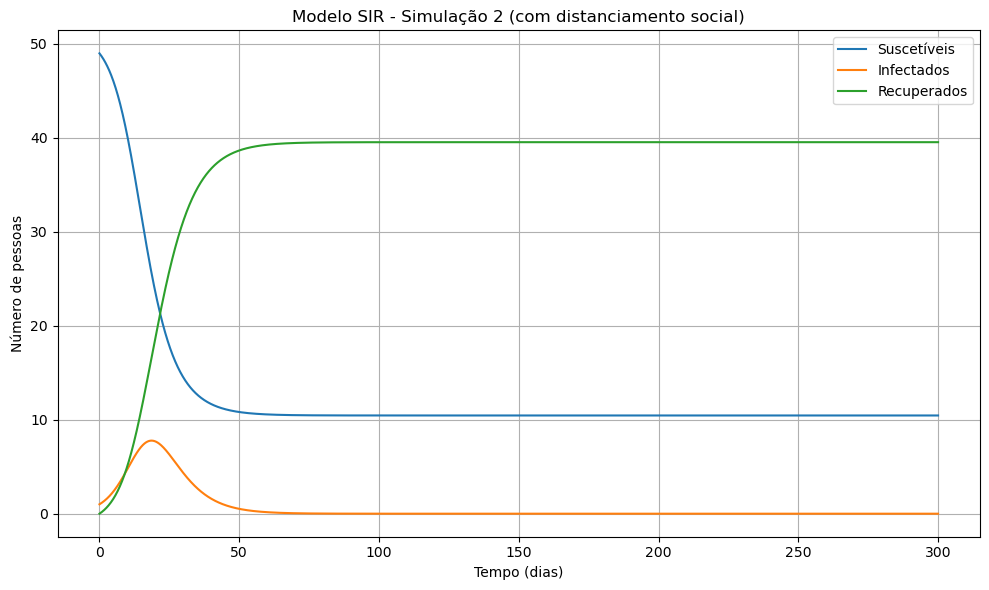

In [8]:
# Executar simulação
y0 = [S0, I0, R0]
sol = rk4_system(sir_model(beta, gamma), y0, t)
S, I, R = sol.T

# Plotagem
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tempo (dias)')
plt.ylabel('Número de pessoas')
plt.title('Modelo SIR - Simulação 2 (com distanciamento social)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


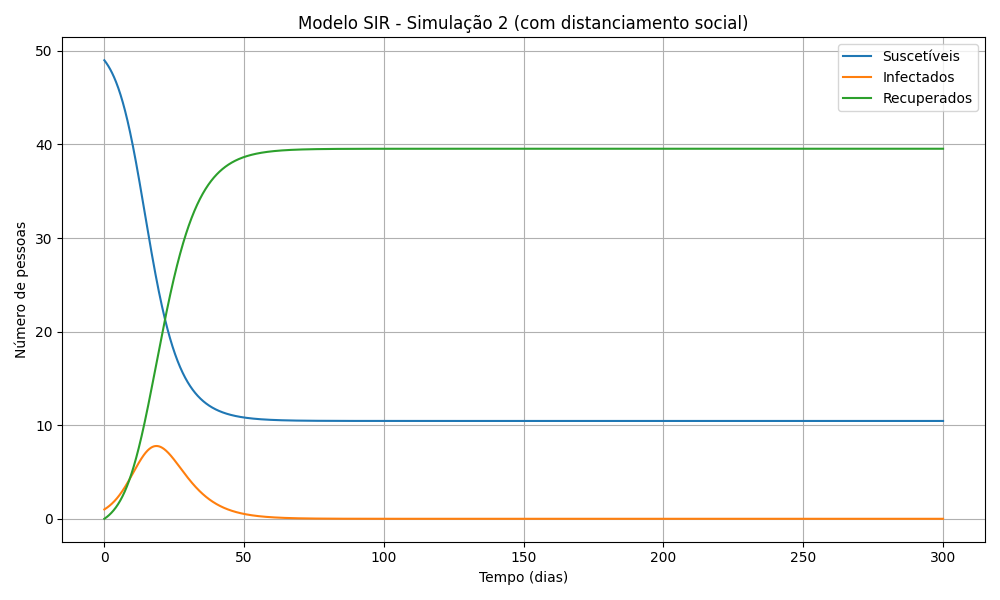

## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: Por causa dos parametros que fornecemos, temos 49 sucetiveis no começo, os quais diminuem em quantidade com o passar dos dias. Por volta do dia 40 a curva começa a ficar linear, por volta de 10 pessoas sucetiveis, e esse valor se mantem constante até o fianl dos 300 dias
- `Infectados (I)`: começa com 1 infectado e sua curva começa crescendo, até chegar no pico de infectados, o qual ocorre por volta do dia 15, e depois começa a decrescer até proximo do dias 60, que começa a ter um valor proximo de 0 infectados
- `Recuperados (R)`: O número de recuperados aumenta até por volta do dia 50, que é quando se estabiliza no valor 40

**Interpretação**:
devido ao distanciamento social houveram 10 pessoas que não foram infectadas, que podemos perceber ao analisar os valores que as linhas se estabilizam. A linha azul(Sucetiveis) se estabiliza em 10, enquanto a verde(recuperados) se estabiliza em 40, mostrando que ainda faltam 10 pessoas se recuperarem, porém por não haver mais pessoas infectadas, as pessoas sucetiveis permanecem sucetiveis. Com essa interpretação podemos concluir que o distanciamente social é uma ótima medida para controlar uma epidemia, uma vez que sem ela houveram 30 infectados em 5 dias, e com ela só tivemos por volta de 8 infectados em 20 dias.


In [9]:
# Criar um DataFrame com os resultados da Simulação 2
df_sir2 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 2 (Modelo SIR):")
print(df_sir2.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 2 (Modelo SIR):")
print(df_sir2.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 2 (Modelo SIR):")
print(df_sir2.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sir2 = df_sir2['Infectados (I)'].max()
tempo_pico_sir2 = df_sir2.loc[df_sir2['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 2: {pico_infeccoes_sir2:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sir2:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sir2['População Total'] = df_sir2['Suscetíveis (S)'] + df_sir2['Infectados (I)'] + df_sir2['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (Simulação 2 - deve ser constante para o modelo SIR):")
print(df_sir2[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sir2 = df_sir2['População Total'][0]
diferenca_max_populacao_sir2 = (df_sir2['População Total'] - populacao_inicial_sir2).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 2): {diferenca_max_populacao_sir2:.6f}")
if diferenca_max_populacao_sir2 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 2, como esperado para o modelo SIR.")
else:
    print("A População Total não se manteve constante na Simulação 2, pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias para ver a longo prazo)
print("\nValores de S, I, R a cada 50 dias (Simulação 2 - Modelo SIR):")
print(df_sir2[df_sir2['Tempo (Dias)'] % 50 == 0])

# Comparar o pico de infecções e o tempo do pico entre as duas simulações SIR
print("\nComparativo entre Simulação 1 e Simulação 2 (Modelo SIR):")
print(f"Simulação 1 (Sem distanciamento): Pico de {pico_infeccoes:.2f} infecções no dia {tempo_pico:.2f}")
print(f"Simulação 2 (Com distanciamento): Pico de {pico_infeccoes_sir2:.2f} infecções no dia {tempo_pico_sir2:.2f}")
print(f"Redução no pico de infecções: {((pico_infeccoes - pico_infeccoes_sir2) / pico_infeccoes) * 100:.2f}%")
print(f"Atraso no tempo do pico: {tempo_pico_sir2 - tempo_pico:.2f} dias")

# Comparar o número final de suscetíveis (aqueles que não foram infectados)
print(f"\nNúmero final de Suscetíveis (Dia {df_sir1['Tempo (Dias)'].iloc[-1]:.2f}):")
print(f"Simulação 1: {df_sir1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Simulação 2: {df_sir2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Diferença no final de suscetíveis: {df_sir2['Suscetíveis (S)'].iloc[-1] - df_sir1['Suscetíveis (S)'].iloc[-1]:.2f}")


Primeiras linhas dos resultados da Simulação 2 (Modelo SIR):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0           0.0        49.000000        1.000000         0.000000
1           0.1        48.961382        1.018434         0.020184
2           0.2        48.922084        1.037176         0.040739
3           0.3        48.882096        1.056231         0.061673
4           0.4        48.841408        1.075602         0.082991

Últimas linhas dos resultados da Simulação 2 (Modelo SIR):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        10.455237    7.901223e-14        39.544763
2997         299.7        10.455237    7.808288e-14        39.544763
2998         299.8        10.455237    7.716446e-14        39.544763
2999         299.9        10.455237    7.625684e-14        39.544763
3000         300.0        10.455237    7.535990e-14        39.544763

Estatísticas descritivas da Simulação 2 (Modelo SIR):
       Tempo (

-----

```
Primeiras linhas dos resultados da Simulação 2 (Modelo SIR):
    Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0             0.0        49.000000        1.000000         0.000000
1             0.1        48.961382        1.018434         0.020184
2             0.2        48.922084        1.037176         0.040739
3             0.3        48.882096        1.056231         0.061673
4             0.4        48.841408        1.075602         0.082991

Últimas linhas dos resultados da Simulação 2 (Modelo SIR):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        10.455237    7.901223e-14        39.544763
2997         299.7        10.455237    7.808288e-14        39.544763
2998         299.8        10.455237    7.716446e-14        39.544763
2999         299.9        10.455237    7.625684e-14        39.544763
3000         300.0        10.455237    7.535990e-14        39.544763

Estatísticas descritivas da Simulação 2 (Modelo SIR):
        Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
count    3001.00000      3001.000000    3.001000e+03      3001.000000
mean      150.00000        12.713299    6.590259e-01        36.627675
std        86.64584         7.404957    1.744231e+00         8.603556
min         0.00000        10.455237    7.535990e-14         0.000000
25%        75.00000        10.455237    5.382939e-10        39.498367
50%       150.00000        10.455240    3.845019e-06        39.544757
75%       225.00000        10.474203    2.743051e-02        39.544763
max       300.00000        49.000000    7.779711e+00        39.544763

Pico de infecções na Simulação 2: 7.78 indivíduos, ocorrendo aproximadamente no dia 18.60

Variação da População Total ao longo do tempo (Simulação 2 - deve ser constante para o modelo SIR):
      Tempo (Dias)  População Total
2996         299.6             50.0
2997         299.7             50.0
2998         299.8             50.0
2999         299.9             50.0
3000         300.0             50.0

Diferença máxima na População Total em relação ao início (Simulação 2): 0.000000
A População Total se manteve constante (dentro da tolerância) na Simulação 2, como esperado para o modelo SIR.

Valores de S, I, R a cada 50 dias (Simulação 2 - Modelo SIR):
      Tempo (Dias)  Suscetíveis (S)  ...  Recuperados (R)  População Total
0              0.0        49.000000  ...         0.000000             50.0
500           50.0        10.822313  ...        38.661384             50.0
1000         100.0        10.456221  ...        39.542353             50.0
1500         150.0        10.455240  ...        39.544757             50.0
2000         200.0        10.455237  ...        39.544763             50.0
2500         250.0        10.455237  ...        39.544763             50.0
3000         300.0        10.455237  ...        39.544763             50.0

[7 rows x 5 columns]

Comparativo entre Simulação 1 e Simulação 2 (Modelo SIR):
Simulação 1 (Sem distanciamento): Pico de 30.57 infecções no dia 4.40
Simulação 2 (Com distanciamento): Pico de 7.78 infecções no dia 18.60
Redução no pico de infecções: 74.55%
Atraso no tempo do pico: 14.20 dias

Número final de Suscetíveis (Dia 25.00):
Simulação 1: 0.02
Simulação 2: 10.46
Diferença no final de suscetíveis: 10.43
```

---
## Modelo SIRS
### 📈 Simulação 1 -  (300 dias)
#### Objetivo:
$\nu = 1/50$. Considera reinfecção com 50 dias de imunidade média. $\beta$ reduzido.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rk4_system(func, y0, t):
    """ Runge-Kutta de quarta ordem para sistemas de EDOs. """
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(1, n):
        k1 = func(t[i-1], y[i-1])
        k2 = func(t[i-1] + h/2, y[i-1] + h/2 * k1)
        k3 = func(t[i-1] + h/2, y[i-1] + h/2 * k2)
        k4 = func(t[i-1] + h, y[i-1] + h * k3)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return y

In [11]:
# Sistema SIRS com reinfecção
def sirs_model(beta, gamma, nu):
    def f(t, y):
        S, I, R = y
        dS = -beta * S * I + nu * R
        dI = beta * S * I - gamma * I
        dR = gamma * I - nu * R
        return np.array([dS, dI, dR])
    return f

In [12]:
# Parâmetros da Simulação 2
# Estamos usando o tempo em dias
beta_h = 10. / (40 * 8 * 24)
gamma_h = 3. / (15 * 24)
beta_sir2 = (beta_h * 24) / 4  # beta reduzido
gamma = gamma_h * 24
nu1 = 1 / 50  # perda de imunidade (Para simulação 2: nu1 = 1/90)

# Condições iniciais
S0, I0, R0 = 49.0, 1.0, 0.0

# Tempo
t0 = 0
tn = 300           # duração em dias
dt = 0.1
num_passo = int(tn / dt)
t = np.linspace(t0, tn, num_passo + 1)

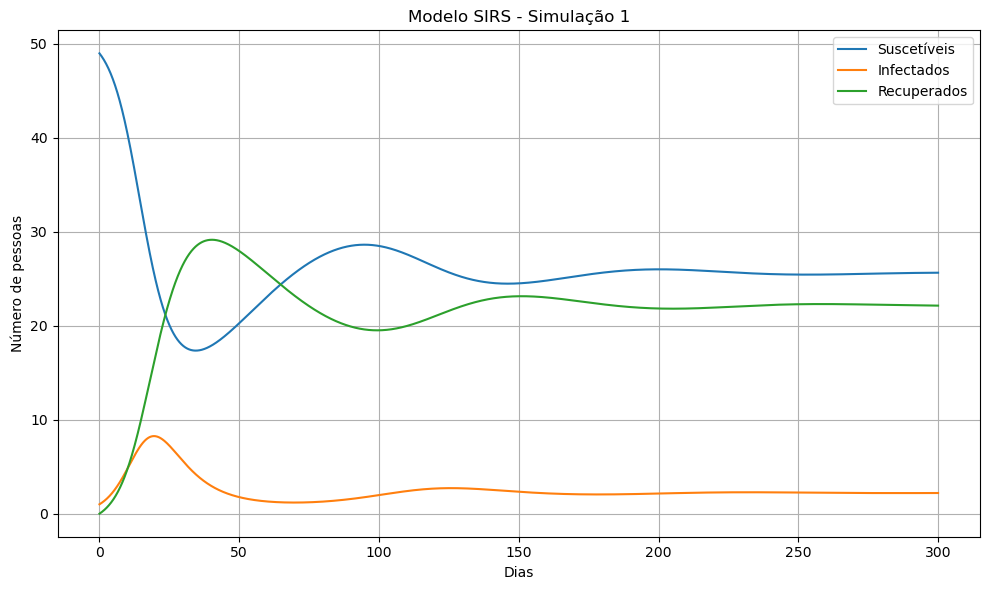

In [13]:
# Executar simulação
y0 = [S0, I0, R0]
sol = rk4_system(sirs_model(beta_sir2, gamma, nu1), y0, t)
S, I, R = sol.T

# Plotagem
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SIRS - Simulação 1')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

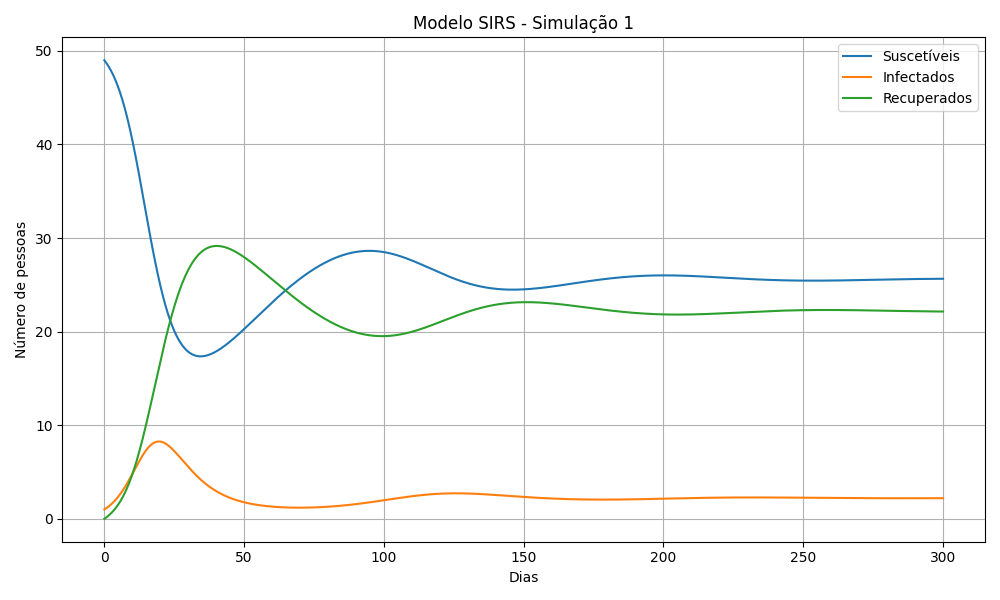

## 🔬 Análise dos Resultados

Com perda média de imunidade após 50 dias e taxa de infecção reduzida:


- `Suscetíveis (S)`: O número de suscetíveis diminui lentamente no início, mas devido à perda de imunidade (indivíduos retornando de R para S), a população suscetível não cai para zero.
- `Infectados (I)`: A curva de infectados começa crescendo, tem seu pico aproximandamente no dia 20, e passa por um estado de oscilação até se estabilizar por volta do dia 250
- `Recuperados (R)`: começa crescendo, juntamente com a taxa de infectados, até seu pico um pouco após o pico de infecções, aproximadamente no dia 40, que após isso também entra em carater oscilatório e se estabiliza proximo do dia 250 também.

**Interpretação**:
Diferente do modelo SIR clássico, o modelo SIRS permite reinfecção. Como resultado, a epidemia não se extingue completamente. O sistema tende a um equilíbrio endêmico ou a um comportamento oscilatório, onde a doença permanece presente na população em um nível baixo, porém persistente. A perda de imunidade (parâmetro `nu`) é fundamental para esse comportamento de longo prazo.


In [14]:
# Criar um DataFrame com os resultados da Simulação 1 (SIRS)
df_sirs1 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 1 (Modelo SIRS):")
print(df_sirs1.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 1 (Modelo SIRS):")
print(df_sirs1.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 1 (Modelo SIRS):")
print(df_sirs1.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirs1 = df_sirs1['Infectados (I)'].max()
tempo_pico_sirs1 = df_sirs1.loc[df_sirs1['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 1 (SIRS): {pico_infeccoes_sirs1:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirs1:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sirs1['População Total'] = df_sirs1['Suscetíveis (S)'] + df_sirs1['Infectados (I)'] + df_sirs1['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (Simulação 1 - SIRS):")
print(df_sirs1[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirs1 = df_sirs1['População Total'][0]
diferenca_max_populacao_sirs1 = (df_sirs1['População Total'] - populacao_inicial_sirs1).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 1 - SIRS): {diferenca_max_populacao_sirs1:.6f}")
if diferenca_max_populacao_sirs1 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 1 (SIRS).")
else:
    print("A População Total não se manteve constante na Simulação 1 (SIRS), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias)
print("\nValores de S, I, R a cada 50 dias (Simulação 1 - Modelo SIRS):")
print(df_sirs1[df_sirs1['Tempo (Dias)'] % 50 == 0])

# Análise qualitativa adicional: Verificar se o número de infectados tende a um estado estacionário ou oscila
print("\nComportamento final dos Infectados (Simulação 1 - SIRS):")
print(df_sirs1['Infectados (I)'].tail())

Primeiras linhas dos resultados da Simulação 1 (Modelo SIRS):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0           0.0        49.000000        1.000000         0.000000
1           0.1        48.961402        1.018434         0.020164
2           0.2        48.922165        1.037176         0.040659
3           0.3        48.882279        1.056231         0.061490
4           0.4        48.841734        1.075602         0.082664

Últimas linhas dos resultados da Simulação 1 (Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        25.650041        2.201888        22.148071
2997         299.7        25.650212        2.201974        22.147814
2998         299.8        25.650381        2.202061        22.147559
2999         299.9        25.650547        2.202148        22.147306
3000         300.0        25.650710        2.202235        22.147055

Estatísticas descritivas da Simulação 1 (Modelo SIRS):
       Temp

-----
```
Primeiras linhas dos resultados da Simulação 1 (Modelo SIRS):
    Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0             0.0        49.000000        1.000000         0.000000
1             0.1        48.961402        1.018434         0.020164
2             0.2        48.922165        1.037176         0.040659
3             0.3        48.882279        1.056231         0.061490
4             0.4        48.841734        1.075602         0.082664

Últimas linhas dos resultados da Simulação 1 (Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        25.650041        2.201888        22.148071
2997         299.7        25.650212        2.201974        22.147814
2998         299.8        25.650381        2.202061        22.147559
2999         299.9        25.650547        2.202148        22.147306
3000         300.0        25.650710        2.202235        22.147055

Estatísticas descritivas da Simulação 1 (Modelo SIRS):
        Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
count    3001.00000      3001.000000     3001.000000      3001.000000
mean      150.00000        25.940638        2.522814        21.536549
std        86.64584         4.698635        1.371561         4.824186
min         0.00000        17.359334        1.000000         0.000000
25%        75.00000        24.893279        2.067767        21.822617
50%       150.00000        25.579445        2.211279        22.199173
75%       225.00000        26.006811        2.406832        22.791939
max       300.00000        49.000000        8.260848        29.158919

Pico de infecções na Simulação 1 (SIRS): 8.26 indivíduos, ocorrendo aproximadamente no dia 19.50

Variação da População Total ao longo do tempo (Simulação 1 - SIRS):
      Tempo (Dias)  População Total
2996         299.6             50.0
2997         299.7             50.0
2998         299.8             50.0
2999         299.9             50.0
3000         300.0             50.0

Diferença máxima na População Total em relação ao início (Simulação 1 - SIRS): 0.000000
A População Total se manteve constante (dentro da tolerância) na Simulação 1 (SIRS).

Valores de S, I, R a cada 50 dias (Simulação 1 - Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  ...  Recuperados (R)  População Total
0              0.0        49.000000  ...         0.000000             50.0
500           50.0        20.276627  ...        27.958866             50.0
1000         100.0        28.499042  ...        19.519960             50.0
1500         150.0        24.517531  ...        23.147085             50.0
2000         200.0        26.011763  ...        21.841061             50.0
2500         250.0        25.451509  ...        22.295394             50.0
3000         300.0        25.650710  ...        22.147055             50.0

[7 rows x 5 columns]

Comportamento final dos Infectados (Simulação 1 - SIRS):
2996    2.201888
2997    2.201974
2998    2.202061
2999    2.202148
3000    2.202235
Name: Infectados (I), dtype: float64

```


## Modelo SIRS
### 📈 Simulação 2 -  (300 dias)
#### Objetivo:
Altera tempo médio de imunidade para 90 dias: $\nu = 1/90$.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [15]:
# Parâmetros da Simulação 2
# Estamos usando o tempo em dias
beta_h = 10. / (40 * 8 * 24)
gamma_h = 3. / (15 * 24)
beta_sir2 = (beta_h * 24) / 4  # beta reduzido
gamma = gamma_h * 24
nu1 = 1 / 90  # perda de imunidade (Para simulação 2: nu1 = 1/90)

# Condições iniciais
S0, I0, R0 = 49.0, 1.0, 0.0

# Tempo
t0 = 0
tn = 300           # duração em dias
dt = 0.1
num_passo = int(tn / dt)
t = np.linspace(t0, tn, num_passo + 1)

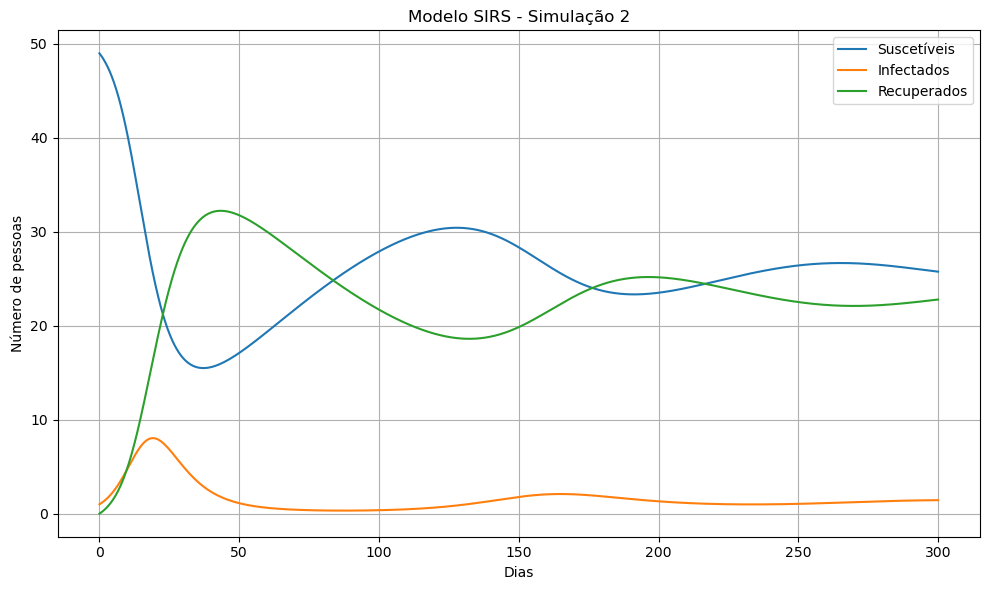

In [16]:
# Executar simulação
y0 = [S0, I0, R0]
sol = rk4_system(sirs_model(beta_sir2, gamma, nu1), y0, t)
S, I, R = sol.T

# Plotagem
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SIRS - Simulação 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

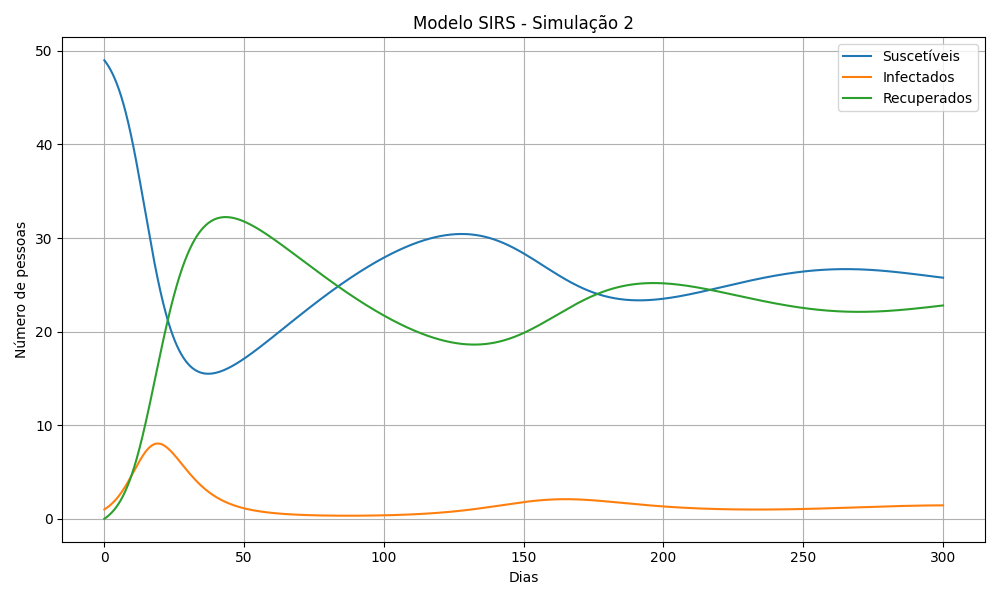

## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: Apresenta um caráter mais ocilatorio em relação à simulação com tempo menor para perda da imunidade, apresentando seu menor valor por volta do dia 40.
- `Infectados (I)`: Apresenta um caráter mais ocilatorio em relação à simulação com tempo menor para perda da imunidade, apresentando seu pico por volta do dia 20, um pouco antes do pico dos recuperados.
- `Recuperados (R)`: Apresenta um caráter mais ocilatorio em relação à simulação com tempo menor para perda da imunidade, apresentando seu pico por volta do dia 40, juntamente com o menos vaor de pessoas sucetiveis.

**Interpretação**:
Observando os gráficos e os valores finais, a Simulação 2 (com imunidade mais duradoura, ν=1/90) tem um carater mais oscilatorio, uma vez que pessoaas que se recuperaram permancem mais tempo imunes, diferentemente da versão anteriro, a curva de recuperados supera a curva de pessoas sucetiveis, mostrando que as pessoas realmente estão mantendo a imunidade por mais tempo, o que condiz com os parametros que fornecemos


In [17]:
# Criar um DataFrame com os resultados da Simulação 2 (SIRS)
df_sirs2 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 2 (Modelo SIRS):")
print(df_sirs2.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 2 (Modelo SIRS):")
print(df_sirs2.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 2 (Modelo SIRS):")
print(df_sirs2.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirs2 = df_sirs2['Infectados (I)'].max()
tempo_pico_sirs2 = df_sirs2.loc[df_sirs2['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 2 (SIRS): {pico_infeccoes_sirs2:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirs2:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sirs2['População Total'] = df_sirs2['Suscetíveis (S)'] + df_sirs2['Infectados (I)'] + df_sirs2['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (Simulação 2 - SIRS):")
print(df_sirs2[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirs2 = df_sirs2['População Total'][0]
diferenca_max_populacao_sirs2 = (df_sirs2['População Total'] - populacao_inicial_sirs2).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 2 - SIRS): {diferenca_max_populacao_sirs2:.6f}")
if diferenca_max_populacao_sirs2 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 2 (SIRS).")
else:
    print("A População Total não se manteve constante na Simulação 2 (SIRS), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias)
print("\nValores de S, I, R a cada 50 dias (Simulação 2 - Modelo SIRS):")
print(df_sirs2[df_sirs2['Tempo (Dias)'] % 50 == 0])

# Análise qualitativa adicional: Verificar se o número de infectados tende a um estado estacionário ou oscila
print("\nComportamento final dos Infectados (Simulação 2 - SIRS):")
print(df_sirs2['Infectados (I)'].tail())

# Comparar o pico de infecções e o tempo do pico entre as duas simulações SIRS
print("\nComparativo entre Simulação 1 (ν=1/50) e Simulação 2 (ν=1/90) - Modelo SIRS:")
print(f"Simulação 1 (ν=1/50): Pico de {pico_infeccoes_sirs1:.2f} infecções no dia {tempo_pico_sirs1:.2f}")
print(f"Simulação 2 (ν=1/90): Pico de {pico_infeccoes_sirs2:.2f} infecções no dia {tempo_pico_sirs2:.2f}")

# Comparar o comportamento de longo prazo dos Infectados (últimos valores)
print("\nComparativo do número final de Infectados (Dia 300):")
print(f"Simulação 1 (ν=1/50): {df_sirs1['Infectados (I)'].iloc[-1]:.2f}")
print(f"Simulação 2 (ν=1/90): {df_sirs2['Infectados (I)'].iloc[-1]:.2f}")


Primeiras linhas dos resultados da Simulação 2 (Modelo SIRS):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0           0.0        49.000000        1.000000         0.000000
1           0.1        48.961393        1.018434         0.020173
2           0.2        48.922129        1.037176         0.040694
3           0.3        48.882198        1.056231         0.061571
4           0.4        48.841589        1.075602         0.082809

Últimas linhas dos resultados da Simulação 2 (Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        25.778193        1.439349        22.782457
2997         299.7        25.774522        1.439548        22.785930
2998         299.8        25.770854        1.439742        22.789404
2999         299.9        25.767191        1.439932        22.792877
3000         300.0        25.763532        1.440118        22.796350

Estatísticas descritivas da Simulação 2 (Modelo SIRS):
       Temp

-----
```
Primeiras linhas dos resultados da Simulação 2 (Modelo SIRS):
    Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0             0.0        49.000000        1.000000         0.000000
1             0.1        48.961393        1.018434         0.020173
2             0.2        48.922129        1.037176         0.040694
3             0.3        48.882198        1.056231         0.061571
4             0.4        48.841589        1.075602         0.082809

Últimas linhas dos resultados da Simulação 2 (Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        25.778193        1.439349        22.782457
2997         299.7        25.774522        1.439548        22.785930
2998         299.8        25.770854        1.439742        22.789404
2999         299.9        25.767191        1.439932        22.792877
3000         300.0        25.763532        1.440118        22.796350

Estatísticas descritivas da Simulação 2 (Modelo SIRS):
        Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
count    3001.00000      3001.000000     3001.000000      3001.000000
mean      150.00000        25.759491        1.635823        22.604685
std        86.64584         5.476629        1.591090         5.690913
min         0.00000        15.499899        0.329484         0.000000
25%        75.00000        23.549959        0.896554        20.976398
50%       150.00000        25.919893        1.202909        22.733886
75%       225.00000        27.495685        1.749278        25.000043
max       300.00000        49.000000        8.044777        32.241882

Pico de infecções na Simulação 2 (SIRS): 8.04 indivíduos, ocorrendo aproximadamente no dia 19.10

Variação da População Total ao longo do tempo (Simulação 2 - SIRS):
      Tempo (Dias)  População Total
2996         299.6             50.0
2997         299.7             50.0
2998         299.8             50.0
2999         299.9             50.0
3000         300.0             50.0

Diferença máxima na População Total em relação ao início (Simulação 2 - SIRS): 0.000000
A População Total se manteve constante (dentro da tolerância) na Simulação 2 (SIRS).

Valores de S, I, R a cada 50 dias (Simulação 2 - Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  ...  Recuperados (R)  População Total
0              0.0        49.000000  ...         0.000000             50.0
500           50.0        17.114926  ...        31.765717             50.0
1000         100.0        27.908387  ...        21.720635             50.0
1500         150.0        28.352810  ...        19.860206             50.0
2000         200.0        23.518973  ...        25.162961             50.0
2500         250.0        26.423074  ...        22.528258             50.0
3000         300.0        25.763532  ...        22.796350             50.0

[7 rows x 5 columns]

Comportamento final dos Infectados (Simulação 2 - SIRS):
2996    1.439349
2997    1.439548
2998    1.439742
2999    1.439932
3000    1.440118
Name: Infectados (I), dtype: float64

Comparativo entre Simulação 1 (ν=1/50) e Simulação 2 (ν=1/90) - Modelo SIRS:
Simulação 1 (ν=1/50): Pico de 8.26 infecções no dia 19.50
Simulação 2 (ν=1/90): Pico de 8.04 infecções no dia 19.10

Comparativo do número final de Infectados (Dia 300):
Simulação 1 (ν=1/50): 2.20
Simulação 2 (ν=1/90): 1.44
```


---
## Modelo SIRV
### 📈 Simulação 1 -  (300 dias)
#### Objetivo:
Vacinação com $p = 0.0005$, imunidade média de 50 dias.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rk4_system(func, y0, t):
    """ Runge-Kutta de quarta ordem para sistemas de EDOs. """
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(1, n):
        k1 = func(t[i-1], y[i-1])
        k2 = func(t[i-1] + h/2, y[i-1] + h/2 * k1)
        k3 = func(t[i-1] + h/2, y[i-1] + h/2 * k2)
        k4 = func(t[i-1] + h, y[i-1] + h * k3)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return y

In [19]:
# Define o sistema de EDOs SIRV
def sirv_model(beta_sirv, gamma_sirv, nu_sirv, p_sirv):
    """ Define o modelo SIR.
    Args:
        beta_sirs: Taxa de infecção.
        gamma_sirs: Taxa de recuperação.
    Returns:
        f: Função que define o sistema de EDOs SIR.
    """
    def f(t, y):
        S, I, R, V = y
        dS = -beta_sirv * S * I + nu_sirv * R - p_sirv * S
        dI = beta_sirv * S * I - gamma_sirv * I
        dR = gamma_sirv * I - nu_sirv * R
        dV = p_sirv * S
        return np.array([dS, dI, dR, dV])
    return f


In [20]:
# --- Parâmetros da Simulação 1 (em horas) ---

beta = (10. / (40 * 8 * 24)) / 4
gamma = 3. / (15 * 24)
nu = 1 / (90 * 24)
p = 0.0005

# Condições iniciais
S0, I0, R0, V0 = 49.0, 1.0, 0.0, 0.0

# Tempo em horas
D_dias = 300
dt = 0.1
N = int(D_dias * 24 / dt)
t = np.linspace(0, D_dias * 24, N + 1)


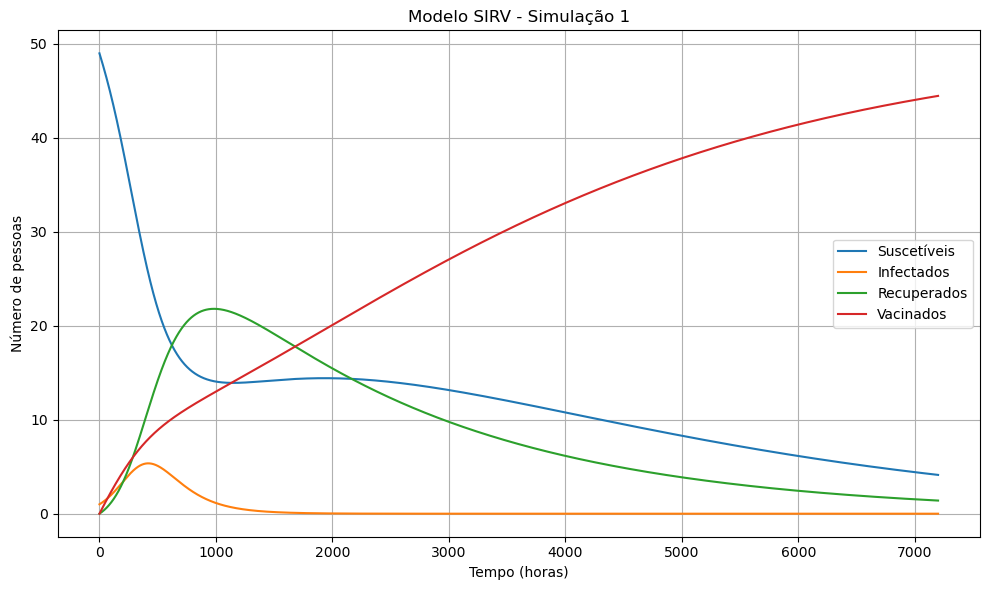

In [21]:
# Executar simulação
y0 = [S0, I0, R0, V0]
sol = rk4_system(sirv_model(beta, gamma, nu, p), y0, t)
S, I, R, V = sol.T

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.plot(t, V, label='Vacinados')
plt.xlabel('Tempo (horas)')
plt.ylabel('Número de pessoas')
plt.title('Modelo SIRV - Simulação 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

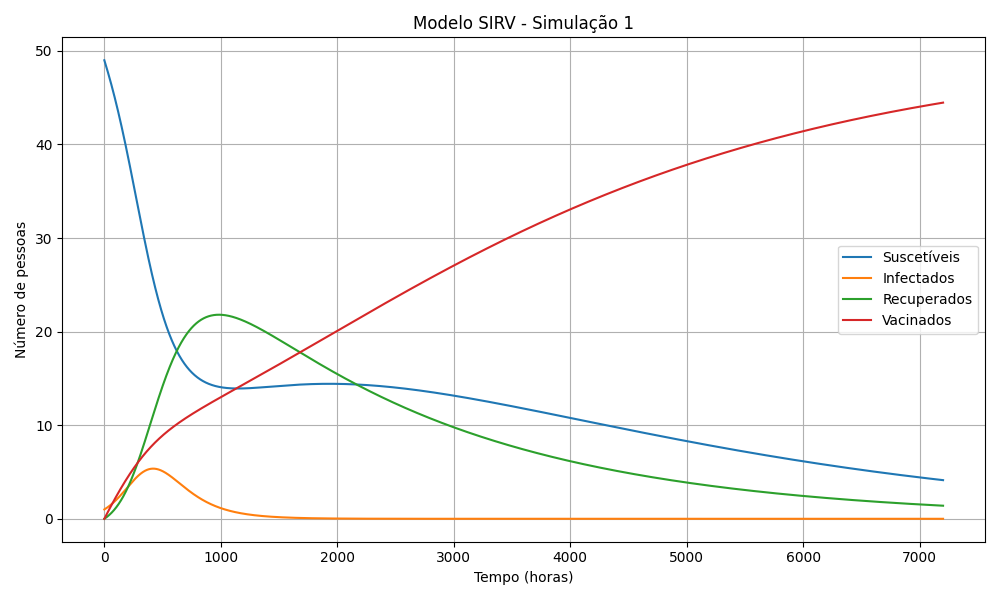

## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: A população suscetível diminui de forma gradual, tanto pelo contágio quanto pela vacinação. A vacinação acelera a queda de S, contribuindo para o controle da epidemia.
- `Infectados (I)`: O pico de infectados é moderado e ocorre por volta do dia 40. A curva apresenta uma subida suave, indicando que o avanço da doença foi desacelerado, e depois ela permanece descrecente até o final, sem o carater oscilatorio do modelo SIRS, uma vez que temos uma medida de prevenção.
- `Recuperados (R)`: A curva de recuperados cresce, mas tende a se estabilizar, já que menos pessoas são infectadas com o passar do tempo devido a vacinação.
- `Vacinados (V)`: A vacinação progride continuamente. A curva de V cresce rapidamente e atinge um patamar elevado, indicando boa cobertura vacinal ao longo dos 300 dias.

**Interpretação**:
A vacinação eficiente com alta adesão contribui fortemente para conter a epidemia. Podemos perceber isso ao notar que o numero de pessoas sucetiveis tende a decrescer com o aumenta da vacinação, além de vermos que o pico de infectados permanceu abaixo de 10, mostrando que juntar as mededias de distanciamente social e vacinação é uma ótima forma de minimizar o número de pessoas infectadas ao longo do tempo

**Nota**:
Para uma melhor visualização do gráfico optamos por deixar esse gráfico na escala de horas

In [22]:
# Análise do Modelo SIRV - Simulação 1
# Criar um DataFrame com os resultados da Simulação 1 (SIRV)
df_sirv1 = pd.DataFrame({'Tempo (Horas)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R, 'Vacinados (V)': V})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 1 (Modelo SIRV):")
print(df_sirv1.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 1 (Modelo SIRV):")
print(df_sirv1.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 1 (Modelo SIRV):")
print(df_sirv1.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirv1 = df_sirv1['Infectados (I)'].max()
tempo_pico_sirv1 = df_sirv1.loc[df_sirv1['Infectados (I)'].idxmax(), 'Tempo (Horas)']

print(f"\nPico de infecções na Simulação 1 (SIRV): {pico_infeccoes_sirv1:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirv1:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R+V é constante
df_sirv1['População Total'] = df_sirv1['Suscetíveis (S)'] + df_sirv1['Infectados (I)'] + df_sirv1['Recuperados (R)'] + df_sirv1['Vacinados (V)']

print("\nVariação da População Total ao longo do tempo (Simulação 1 - SIRV):")
print(df_sirv1[['Tempo (Horas)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirv1 = df_sirv1['População Total'][0]
diferenca_max_populacao_sirv1 = (df_sirv1['População Total'] - populacao_inicial_sirv1).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 1 - SIRV): {diferenca_max_populacao_sirv1:.6f}")
if diferenca_max_populacao_sirv1 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 1 (SIRV), como esperado.")
else:
    print("A População Total não se manteve constante na Simulação 1 (SIRV), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 Horas)
print("\nValores de S, I, R, V a cada 50 Horas (Simulação 1 - Modelo SIRV):")
print(df_sirv1[df_sirv1['Tempo (Horas)'] % 50 == 0])

# Análise qualitativa adicional: Verificar o comportamento final dos grupos
print("\nComportamento final dos grupos (Simulação 1 - SIRV):")
print(df_sirv1[['Suscetíveis (S)', 'Infectados (I)', 'Recuperados (R)', 'Vacinados (V)']].tail())

'''
# Comparar com SIRS Simulação 2 (mesmos beta e nu, mas sem vacinação)
print("\nComparativo: SIRV Simulação 1 (Vacinação) vs SIRS Simulação 2 (Sem Vacinação):")
print(f"SIRV Simulação 1: Pico de {pico_infeccoes_sirv1:.2f} infecções no dia {tempo_pico_sirv1:.2f}")
print(f"SIRS Simulação 2: Pico de {pico_infeccoes_sirs2:.2f} infecções no dia {tempo_pico_sirs2:.2f}")
print(f"Redução no pico de infecções devido à vacinação: {((pico_infeccoes_sirs2 - pico_infeccoes_sirv1) / pico_infeccoes_sirs2) * 100:.2f}%")
print(f"Atraso ou adiantamento no tempo do pico devido à vacinação: {tempo_pico_sirv1 - tempo_pico_sirs2:.2f} Horas")

print(f"\nNúmero final de Suscetíveis (Dia {df_sirv1['Tempo (Horas)'].iloc[-1]:.2f}):")
print(f"SIRV Simulação 1: {df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"SIRS Simulação 2: {df_sirs2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Diferença no final de suscetíveis (mais em SIRS sem vacina): {df_sirs2['Suscetíveis (S)'].iloc[-1] - df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")

print(f"\nNúmero final de Vacinados (SIRV Simulação 1): {df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")

# Verificação da contribuição da vacinação na redução de suscetíveis
print(f"\nSuscetíveis removidos pela infecção/recuperação (SIRS Sim 2): {S0 - df_sirs2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Suscetíveis removidos pela infecção/recuperação OU vacinação (SIRV Sim 1): {S0 - df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"População que foi vacinada (SIRV Sim 1): {df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")
print(f"População que foi infectada/recuperada (SIRV Sim 1): {df_sirv1['Recuperados (R)'].iloc[-1]:.2f}")
# Note que S0 - S_final_SIRV1 deveria ser aproximadamente R_final_SIRV1 + V_final_SIRV1 (desconsiderando I_final que é pequeno)
print(f"S0 - S_final_SIRV1: {S0 - df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"R_final_SIRV1 + V_final_SIRV1: {df_sirv1['Recuperados (R)'].iloc[-1] + df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")
'''

Primeiras linhas dos resultados da Simulação 1 (Modelo SIRV):
   Tempo (Horas)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
0            0.0        49.000000        1.000000         0.000000   
1            0.1        48.995955        1.000762         0.000834   
2            0.2        48.991908        1.001524         0.001668   
3            0.3        48.987861        1.002287         0.002503   
4            0.4        48.983813        1.003050         0.003338   

   Vacinados (V)  
0       0.000000  
1       0.002450  
2       0.004900  
3       0.007349  
4       0.009798  

Últimas linhas dos resultados da Simulação 1 (Modelo SIRV):
       Tempo (Horas)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
71996         7199.6         4.130775    3.291997e-14         1.398999   
71997         7199.7         4.130634    3.289697e-14         1.398935   
71998         7199.8         4.130492    3.287398e-14         1.398870   
71999         7199.9         4.130350    3.285

'\n# Comparar com SIRS Simulação 2 (mesmos beta e nu, mas sem vacinação)\nprint("\nComparativo: SIRV Simulação 1 (Vacinação) vs SIRS Simulação 2 (Sem Vacinação):")\nprint(f"SIRV Simulação 1: Pico de {pico_infeccoes_sirv1:.2f} infecções no dia {tempo_pico_sirv1:.2f}")\nprint(f"SIRS Simulação 2: Pico de {pico_infeccoes_sirs2:.2f} infecções no dia {tempo_pico_sirs2:.2f}")\nprint(f"Redução no pico de infecções devido à vacinação: {((pico_infeccoes_sirs2 - pico_infeccoes_sirv1) / pico_infeccoes_sirs2) * 100:.2f}%")\nprint(f"Atraso ou adiantamento no tempo do pico devido à vacinação: {tempo_pico_sirv1 - tempo_pico_sirs2:.2f} Horas")\n\nprint(f"\nNúmero final de Suscetíveis (Dia {df_sirv1[\'Tempo (Horas)\'].iloc[-1]:.2f}):")\nprint(f"SIRV Simulação 1: {df_sirv1[\'Suscetíveis (S)\'].iloc[-1]:.2f}")\nprint(f"SIRS Simulação 2: {df_sirs2[\'Suscetíveis (S)\'].iloc[-1]:.2f}")\nprint(f"Diferença no final de suscetíveis (mais em SIRS sem vacina): {df_sirs2[\'Suscetíveis (S)\'].iloc[-1] - df_sirv1[\'S

-----

```
Primeiras linhas dos resultados da Simulação 1 (Modelo SIRV):
    Tempo (Horas)  Suscetíveis (S)  ...  Recuperados (R)  Vacinados (V)
0              0.0        49.000000  ...         0.000000       0.000000
1              0.1        48.995955  ...         0.000834       0.002450
2              0.2        48.991908  ...         0.001668       0.004900
3              0.3        48.987861  ...         0.002503       0.007349
4              0.4        48.983813  ...         0.003338       0.009798

[5 rows x 5 columns]

Últimas linhas dos resultados da Simulação 1 (Modelo SIRV):
        Tempo (Horas)  Suscetíveis (S)  ...  Recuperados (R)  Vacinados (V)
71996         7199.6         4.130775  ...         1.398999      44.470225
71997         7199.7         4.130634  ...         1.398935      44.470432
71998         7199.8         4.130492  ...         1.398870      44.470638
71999         7199.9         4.130350  ...         1.398805      44.470845
72000         7200.0         4.130208  ...         1.398740      44.471051

[5 rows x 5 columns]

Estatísticas descritivas da Simulação 1 (Modelo SIRV):
        Tempo (Horas)  Suscetíveis (S)  ...  Recuperados (R)  Vacinados (V)
count     72001.00000      72001.000000  ...      72001.000000    72001.000000
mean       3600.00000         12.353267  ...          8.628471       28.515584
std        2078.50427          7.650916  ...          6.524915       12.047893
min           0.00000          4.130208  ...          0.000000        0.000000
25%        1800.00000          7.385194  ...          2.952783       18.648953
50%        3600.00000         11.782992  ...          6.447955       30.811438
75%        5400.00000         14.197563  ...         13.594599       39.396338
max        7200.00000         49.000000  ...         21.807450       44.471051

[8 rows x 5 columns]

Pico de infecções na Simulação 1 (SIRV): 5.36 indivíduos, ocorrendo aproximadamente no dia 419.00

Variação da População Total ao longo do tempo (Simulação 1 - SIRV):
        Tempo (Horas)  População Total
71996         7199.6             50.0
71997         7199.7             50.0
71998         7199.8             50.0
71999         7199.9             50.0
72000         7200.0             50.0

Diferença máxima na População Total em relação ao início (Simulação 1 - SIRV): 0.000000
A População Total se manteve constante (dentro da tolerância) na Simulação 1 (SIRV), como esperado.

Valores de S, I, R, V a cada 50 Horas (Simulação 1 - Modelo SIRV):
        Tempo (Horas)  Suscetíveis (S)  ...  Vacinados (V)  População Total
0                  0.0        49.000000  ...       0.000000             50.0
500               50.0        46.863869  ...       1.198788             50.0
1000             100.0        44.472780  ...       2.341062             50.0
1500             150.0        41.805477  ...       3.420114             50.0
2000             200.0        38.881806  ...       4.429185             50.0
...                ...              ...  ...            ...              ...
70000           7000.0         4.421981  ...      44.043580             50.0
70500           7050.0         4.347476  ...      44.153196             50.0
71000           7100.0         4.274018  ...      44.260963             50.0
71500           7150.0         4.201598  ...      44.366906             50.0
72000           7200.0         4.130208  ...      44.471051

[145 rows x 6 columns]

Comportamento final dos grupos (Simulação 1 - SIRV):
        Suscetíveis (S)  Infectados (I)  Recuperados (R)  Vacinados (V)
71996          4.130775    3.291997e-14         1.398999      44.470225
71997          4.130634    3.289697e-14         1.398935      44.470432
71998          4.130492    3.287398e-14         1.398870      44.470638
71999          4.130350    3.285102e-14         1.398805      44.470845
72000          4.130208    3.282807e-14         1.398740      44.471051

```

---
## Modelo SIRV
### 📈 Simulação 2 -  (300 dias)
#### Objetivo:
Taxa de vacinação reduzida: $p = 0.0001$.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $V0 = 0$, $tn = 300$ dias e $β/4$:

In [23]:
# --- Parâmetros da Simulação 2 (em horas) ---

beta = (10. / (40 * 8 * 24)) / 4
gamma = 3. / (15 * 24)
nu = 1 / (90 * 24)
p = 0.0001     # trocamos de 0.0005 para 0.0001

# Condições iniciais
S0, I0, R0, V0 = 49.0, 1.0, 0.0, 0.0

# Tempo em horas
D_dias = 300
dt = 0.1
N = int(D_dias * 24 / dt)
t = np.linspace(0, D_dias * 24, N + 1)


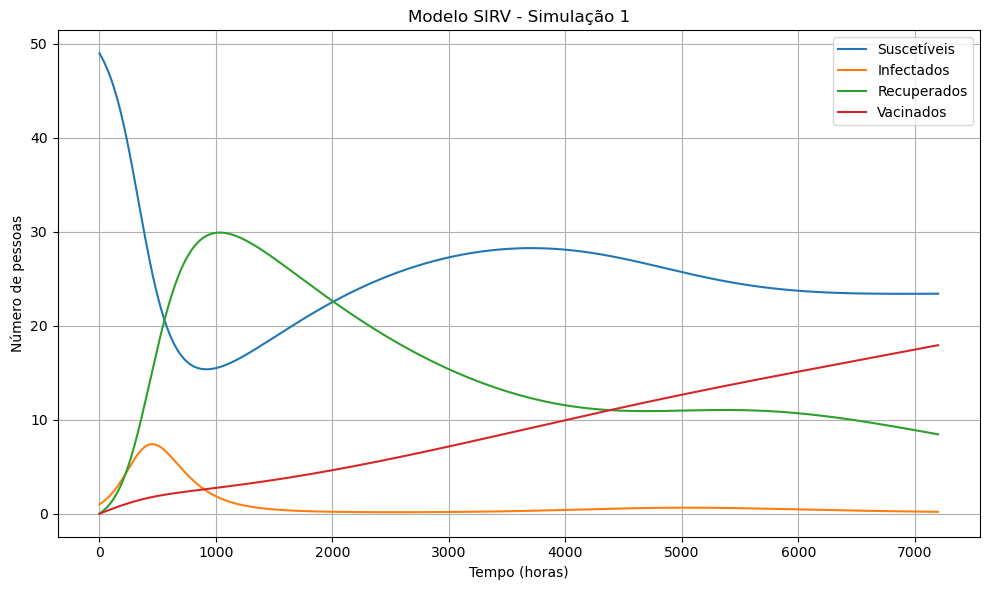

In [24]:
# Executar simulação
y0 = [S0, I0, R0, V0]
sol = rk4_system(sirv_model(beta, gamma, nu, p), y0, t)
S, I, R, V = sol.T

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.plot(t, V, label='Vacinados')
plt.xlabel('Tempo (horas)')
plt.ylabel('Número de pessoas')
plt.title('Modelo SIRV - Simulação 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

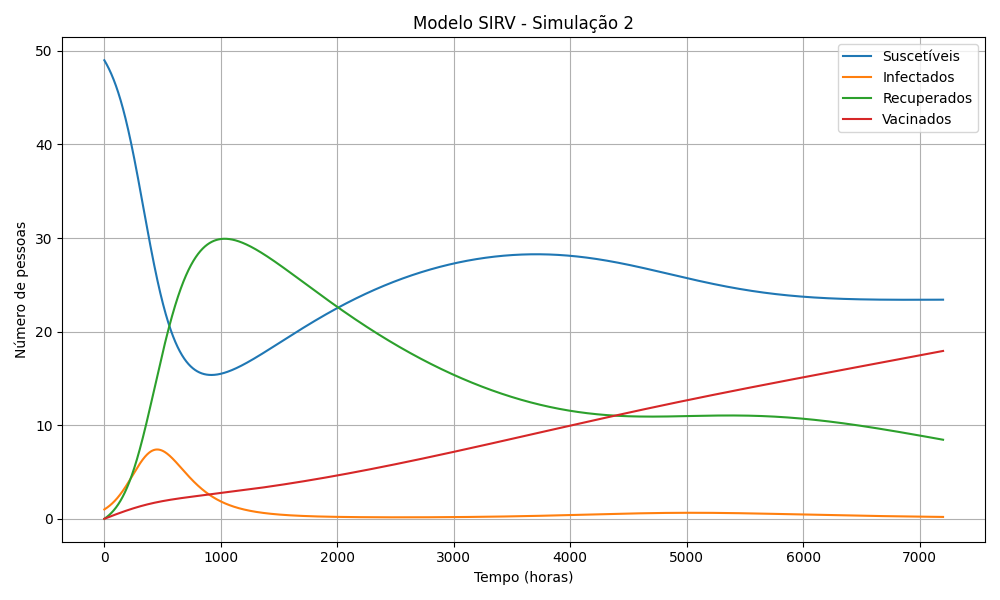

## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: Diferentemente do caso anteiror, no qual a adesão a vacina era maior, podemos ver que a quantidade de pessoas sucestiveis começa decrescendo porém consegue subir novamente, mostrando que a vacinação não está acompanhando o tempo de perca de imunidade.
- `Infectados (I)`: O pico de infectados ainda ocorre no começo, porém devido a baixa adesão podemos ver que por volta de 5000 horas temos uma taxa crescente de infectados, mesmo que seja baixa isso mostra que as pessoas que já foram recuperadas podem estar sendo infectadas novamente.
- `Recuperados (R)`: No começo possui o mesmo formato que a anterior, porém enfrente uma situação similar a curva de infectados.
- `Vacinados (V)`: A curva de vacinados cresce mais devegar devido a menor adesão.

**Interpretação**:
Com uma menor taxa de adesão a vacina podemos ver que leva mais tempo para controlar a epidemeia, além de poder causar uma volta do vírus mesmo após uma grande quantidade de tempo. Apesar dessa reifecção ser baixa, ainda é um problema que, dependendo da causa e origem do vírus, pode provar-se um problema, mostrando que quanto mais a adesão a vacinas, mais rapidamente a epidemia é controlada, reforçando a importancia de incentivar a propagação das vacinas para mais pessoas.


In [25]:
# prompt: Analizar o modelo SIRV - simulação 2

# Análise do Modelo SIRV - Simulação 2
# Criar um DataFrame com os resultados da Simulação 2 (SIRV)
df_sirv2 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R, 'Vacinados (V)': V})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 2 (Modelo SIRV):")
print(df_sirv2.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 2 (Modelo SIRV):")
print(df_sirv2.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 2 (Modelo SIRV):")
print(df_sirv2.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirv2 = df_sirv2['Infectados (I)'].max()
tempo_pico_sirv2 = df_sirv2.loc[df_sirv2['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 2 (SIRV): {pico_infeccoes_sirv2:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirv2:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R+V é constante
df_sirv2['População Total'] = df_sirv2['Suscetíveis (S)'] + df_sirv2['Infectados (I)'] + df_sirv2['Recuperados (R)'] + df_sirv2['Vacinados (V)']

print("\nVariação da População Total ao longo do tempo (Simulação 2 - SIRV):")
print(df_sirv2[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirv2 = df_sirv2['População Total'][0]
diferenca_max_populacao_sirv2 = (df_sirv2['População Total'] - populacao_inicial_sirv2).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 2 - SIRV): {diferenca_max_populacao_sirv2:.6f}")
if diferenca_max_populacao_sirv2 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 2 (SIRV), como esperado.")
else:
    print("A População Total não se manteve constante na Simulação 2 (SIRV), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias)
print("\nValores de S, I, R, V a cada 50 dias (Simulação 2 - Modelo SIRV):")
print(df_sirv2[df_sirv2['Tempo (Dias)'] % 50 == 0])

# Análise qualitativa adicional: Verificar o comportamento final dos grupos
print("\nComportamento final dos grupos (Simulação 2 - SIRV):")
print(df_sirv2[['Suscetíveis (S)', 'Infectados (I)', 'Recuperados (R)', 'Vacinados (V)']].tail())

'''
se rodarmos isso na versão do código com tudo junto funciona, deixamos comentando aqui para pdoer rodar nas versões separadas
# Comparar com SIRV Simulação 1 (mesmo nu, beta, mas p maior)
print("\nComparativo: SIRV Simulação 1 (p=0.0005) vs SIRV Simulação 2 (p=0.0001):")
print(f"SIRV Simulação 1 (p=0.0005): Pico de {pico_infeccoes_sirv1:.2f} infecções no dia {tempo_pico_sirv1:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): Pico de {pico_infeccoes_sirv2:.2f} infecções no dia {tempo_pico_sirv2:.2f}")
print(f"Redução no pico de infecções com maior taxa de vacinação (p=0.0005 vs p=0.0001): {((pico_infeccoes_sirv2 - pico_infeccoes_sirv1) / pico_infeccoes_sirv2) * 100:.2f}%")
print(f"Atraso ou adiantamento no tempo do pico com maior taxa de vacinação: {tempo_pico_sirv1 - tempo_pico_sirv2:.2f} dias")

print(f"\nNúmero final de Suscetíveis (Dia {df_sirv2['Tempo (Dias)'].iloc[-1]:.2f}):")
print(f"SIRV Simulação 1 (p=0.0005): {df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): {df_sirv2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Diferença no final de suscetíveis (maior p resulta em menos suscetíveis): {df_sirv1['Suscetíveis (S)'].iloc[-1] - df_sirv2['Suscetíveis (S)'].iloc[-1]:.2f}")

print(f"\nNúmero final de Vacinados (SIRV Simulação 1 vs 2):")
print(f"SIRV Simulação 1 (p=0.0005): {df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): {df_sirv2['Vacinados (V)'].iloc[-1]:.2f}")

# Verificar o número final de recuperados
print(f"\nNúmero final de Recuperados (SIRV Simulação 1 vs 2):")
print(f"SIRV Simulação 1 (p=0.0005): {df_sirv1['Recuperados (R)'].iloc[-1]:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): {df_sirv2['Recuperados (R)'].iloc[-1]:.2f}")
# Nota: Com menor taxa de vacinação, mais pessoas se tornam imunes através da infecção (maior R final).
'''

Primeiras linhas dos resultados da Simulação 2 (Modelo SIRV):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
0           0.0        49.000000        1.000000         0.000000   
1           0.1        48.997914        1.000762         0.000834   
2           0.2        48.995828        1.001524         0.001668   
3           0.3        48.993740        1.002287         0.002503   
4           0.4        48.991651        1.003051         0.003338   

   Vacinados (V)  
0        0.00000  
1        0.00049  
2        0.00098  
3        0.00147  
4        0.00196  

Últimas linhas dos resultados da Simulação 2 (Modelo SIRV):
       Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
71996        7199.6        23.415101        0.199390         8.449891   
71997        7199.7        23.415106        0.199376         8.449666   
71998        7199.8        23.415111        0.199361         8.449441   
71999        7199.9        23.415116        0.199347    

'\nse rodarmos isso na versão do código com tudo junto funciona, deixamos comentando aqui para pdoer rodar nas versões separadas\n# Comparar com SIRV Simulação 1 (mesmo nu, beta, mas p maior)\nprint("\nComparativo: SIRV Simulação 1 (p=0.0005) vs SIRV Simulação 2 (p=0.0001):")\nprint(f"SIRV Simulação 1 (p=0.0005): Pico de {pico_infeccoes_sirv1:.2f} infecções no dia {tempo_pico_sirv1:.2f}")\nprint(f"SIRV Simulação 2 (p=0.0001): Pico de {pico_infeccoes_sirv2:.2f} infecções no dia {tempo_pico_sirv2:.2f}")\nprint(f"Redução no pico de infecções com maior taxa de vacinação (p=0.0005 vs p=0.0001): {((pico_infeccoes_sirv2 - pico_infeccoes_sirv1) / pico_infeccoes_sirv2) * 100:.2f}%")\nprint(f"Atraso ou adiantamento no tempo do pico com maior taxa de vacinação: {tempo_pico_sirv1 - tempo_pico_sirv2:.2f} dias")\n\nprint(f"\nNúmero final de Suscetíveis (Dia {df_sirv2[\'Tempo (Dias)\'].iloc[-1]:.2f}):")\nprint(f"SIRV Simulação 1 (p=0.0005): {df_sirv1[\'Suscetíveis (S)\'].iloc[-1]:.2f}")\nprint(f"SIRV

-----


```

Primeiras linhas dos resultados da Simulação 2 (Modelo SIRV):
    Tempo (Dias)  Suscetíveis (S)  ...  Recuperados (R)  Vacinados (V)
0             0.0        49.000000  ...         0.000000        0.00000
1             0.1        48.997914  ...         0.000834        0.00049
2             0.2        48.995828  ...         0.001668        0.00098
3             0.3        48.993740  ...         0.002503        0.00147
4             0.4        48.991651  ...         0.003338        0.00196

[5 rows x 5 columns]

Últimas linhas dos resultados da Simulação 2 (Modelo SIRV):
        Tempo (Dias)  Suscetíveis (S)  ...  Recuperados (R)  Vacinados (V)
71996         7199.6        23.415101  ...         8.449891      17.935618
71997         7199.7        23.415106  ...         8.449666      17.935852
71998         7199.8        23.415111  ...         8.449441      17.936086
71999         7199.9        23.415116  ...         8.449216      17.936320
72000         7200.0        23.415122  ...         8.448991      17.936555

[5 rows x 5 columns]

Estatísticas descritivas da Simulação 2 (Modelo SIRV):
        Tempo (Dias)  Suscetíveis (S)  ...  Recuperados (R)  Vacinados (V)
count     72001.00000      72001.000000  ...      72001.000000    72001.000000
mean       3600.00000         24.912038  ...         15.105959        9.001963
std        2078.50427          5.388066  ...          7.018128        5.187460
min           0.00000         15.369972  ...          0.000000        0.000000
25%        1800.00000         23.406559  ...         10.902649        4.195931
50%        3600.00000         24.548496  ...         11.567374        8.828567
75%        5400.00000         27.370259  ...         19.805207       13.671067
max        7200.00000         49.000000  ...         29.924618       17.936555

[8 rows x 5 columns]

Pico de infecções na Simulação 2 (SIRV): 7.41 indivíduos, ocorrendo aproximadamente no dia 453.50

Variação da População Total ao longo do tempo (Simulação 2 - SIRV):
        Tempo (Dias)  População Total
71996         7199.6             50.0
71997         7199.7             50.0
71998         7199.8             50.0
71999         7199.9             50.0
72000         7200.0             50.0

Diferença máxima na População Total em relação ao início (Simulação 2 - SIRV): 0.000000
A População Total se manteve constante (dentro da tolerância) na Simulação 2 (SIRV), como esperado.

Valores de S, I, R, V a cada 50 dias (Simulação 2 - Modelo SIRV):
        Tempo (Dias)  Suscetíveis (S)  ...  Vacinados (V)  População Total
0                  0.0        49.000000  ...       0.000000             50.0
500               50.0        47.807826  ...       0.242150             50.0
1000             100.0        46.260651  ...       0.477486             50.0
1500             150.0        44.281927  ...       0.704036             50.0
2000             200.0        41.826882  ...       0.919508             50.0
...                ...              ...  ...            ...              ...
70000           7000.0        23.406809  ...      17.468344             50.0
70500           7050.0        23.408363  ...      17.585381             50.0
71000           7100.0        23.410349  ...      17.702428             50.0
71500           7150.0        23.412642  ...      17.819485             50.0
72000           7200.0        23.415122  ...      17.936555

[145 rows x 6 columns]

Comportamento final dos grupos (Simulação 2 - SIRV):
        Suscetíveis (S)  Infectados (I)  Recuperados (R)  Vacinados (V)
71996         23.415101        0.199390         8.449891      17.935618
71997         23.415106        0.199376         8.449666      17.935852
71998         23.415111        0.199361         8.449441      17.936086
71999         23.415116        0.199347         8.449216      17.936320
72000         23.415122        0.199333         8.448991      17.936555
```


---
## Conclusão

Neste trabalho, empregamos o método de Runge-Kutta de quarta ordem (RK4) para simular a dinâmica de propagação de doenças em três modelos epidemiológicos distintos: SIR, SIRS e SIRV. O RK4, sendo um método numérico de alta ordem (quarta ordem), provou ser uma ferramenta eficaz e robusta para aproximar as soluções desses sistemas de Equações Diferenciais Ordinárias (EDOs). Sua precisão é significativamente superior à de métodos de ordem inferior, como o método de Euler, minimizando o erro de truncamento a cada passo de tempo e fornecendo aproximações mais fiéis às trajetórias das populações suscetíveis (S), infectadas (I), recuperadas (R) e, no modelo SIRV, vacinadas (V).

A implementação do RK4 exigiu a formulação correta dos sistemas de EDOs para cada modelo (SIR, SIRS, SIRV) e a aplicação iterativa das fórmulas de cálculo dos coeficientes $k_1, k_2, k_3, k_4$ em cada passo de tempo. A estabilidade do método foi evidente nos gráficos gerados, que apresentaram curvas suaves e consistentes com a dinâmica esperada para cada modelo, sem oscilações espúrias ou divergências observadas em métodos menos estáveis para o tamanho de passo utilizado.

Em termos de erros, o método RK4 possui um erro de truncamento local de ordem $O(h^5)$ e um erro global de ordem $O(h^4)$, onde $h$ é o tamanho do passo. Isso significa que a diminuição do tamanho do passo leva a um aumento significativo na precisão das aproximações. A escolha de $dt=0.1$ dias em todas as simulações forneceu um bom equilíbrio entre precisão e custo computacional para os horizontes de tempo simulados. Embora não tenhamos calculado explicitamente o erro em comparação com uma solução analítica (que geralmente não existe para esses sistemas não lineares), a consistência das curvas, a preservação da população total e a observação dos comportamentos qualitativos esperados para cada modelo (extinção no SIR, endemicidade no SIRS/SIRV) indicam que o método RK4 produziu resultados confiáveis.

A eficiência do método RK4 é maior do que métodos de menor ordem para um mesmo nível de precisão desejado, pois permite o uso de passos de tempo maiores para atingir a mesma acurácia. No entanto, a cada passo, o RK4 exige quatro avaliações da função que define o sistema de EDOs (para calcular $k_1, k_2, k_3, k_4$), tornando-o computacionalmente mais intensivo por passo do que, por exemplo, o método de Euler (que exige apenas uma avaliação). Para sistemas grandes ou simulações de longo prazo com passo de tempo muito pequeno, a eficiência computacional pode se tornar um fator a considerar, levando à exploração de métodos numéricos adaptativos ou de maior ordem, mas para este estudo com populações e horizontes de tempo moderados, o RK4 demonstrou ser eficientemente preciso.

Em suma, a aplicação do método de Runge-Kutta de quarta ordem foi bem-sucedida na simulação dos modelos epidemiológicos, permitindo a análise da dinâmica de diferentes cenários de epidemia. Os resultados obtidos foram qualitativamente consistentes com a teoria epidemiológica e a alta ordem do método contribuiu para a precisão das aproximações numéricas. Este trabalho reforça a importância dos métodos numéricos no estudo de fenômenos complexos modelados por EDOs, como a propagação de doenças, e a capacidade do RK4 em fornecer soluções confiáveis para tais problemas.


## 📚 Referências

[1] Burden, R. L., & Faires, J. D. (2010). *Numerical Analysis* (9th ed.). Cengage Learning.

[2] Svein Linge and Hans Petter Langtangen (2020) Programming for Computations - Python, second edition.
Springer Open.

[3] COUTTO FILHO, Milton Brown do; FLÔR, Vinícius Biajoni Braga. *Computação numérica: métodos e implementações*. 2. ed. rev. e ampl. São Paulo: Blucher, 2017.
